# Camera calibration

In this notebook, we experiment with camera calibration in Opencv22.

## Task 1 - Camera Calibration (70%)

Load the given images of a checkerboard in the folder "calibration" and use them for camera calibration with OpenCV.  
The calibraton model should estimate a radial/tangential distortion model with 3 radial and 2 tangential parameters.  
You can use all OpenCV functions. Make sure to refine the found corner locations with `cv2.cornerSubPix`.  
For the given images, assume a checkerboard grid of 9x6 cells. Show the found corner locations of the first 3 images in the notebook (``cv2.drawChessboardCorners``).  
Perform calibration by assuming the physical size of one checkerboard cell is 2.5 cm.  
After calibration, calculate the mean, the closest and the farthest distance to the center of the calibration target to the camera over the different views.  
(Hint: define the checkerboard object coordinates in a way that the center is at the origin and calculate the distances via the norm of the translation part of the pose)  
<!-- At the end of your program, print the camera matrix, the 5 distortion coefficients and the obtained mean, min and max distance to the calibration target center.   -->



Useful functions:
* ``glob.glob('./<folder>/*.jpg')``  (returns a list of all .jpg files in the given subfolder)
* ``cv2.findChessboardCorners`` (use ``cv2.CALIB_CB_ADAPTIVE_THRESH``, ``cv2.CALIB_CB_FAST_CHECK``, and ``cv2.CALIB_CB_NORMALIZE_IMAGE`` flags)
* ``cv2.cornerSubPix``
* ``cv2.drawChessboardCorners`` (to visually verify that the checkerboard was detected correctly)
* ``cv2.calibrateCamera``

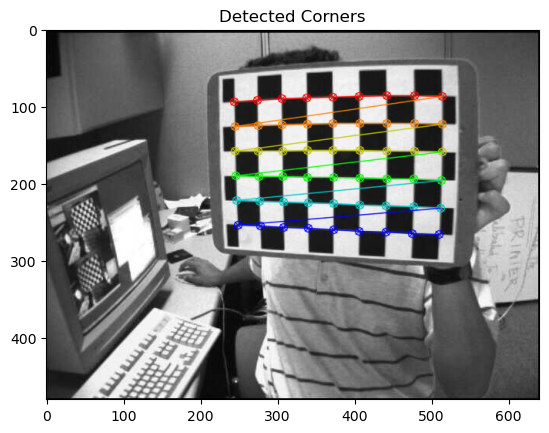

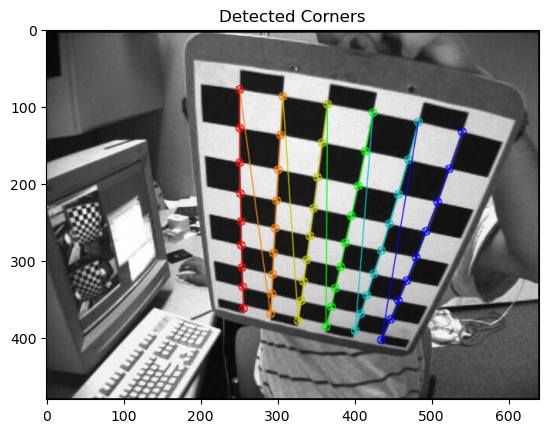

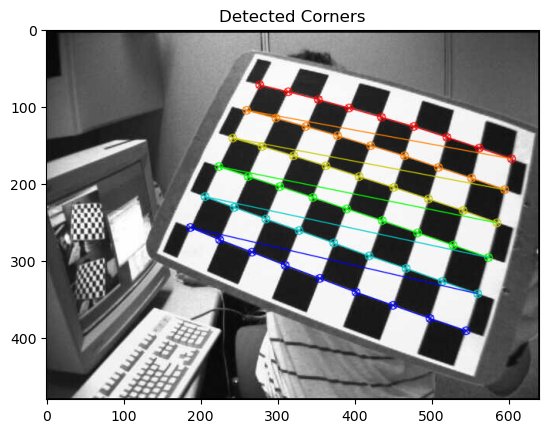

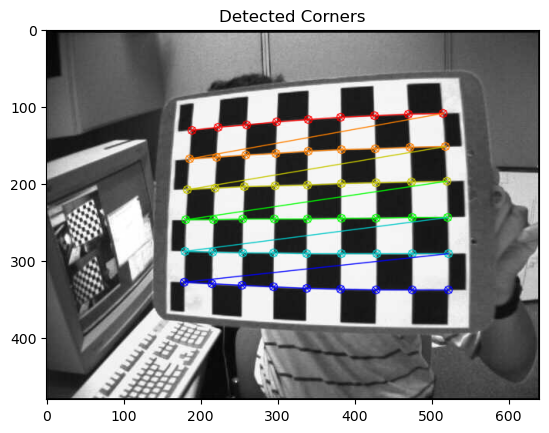

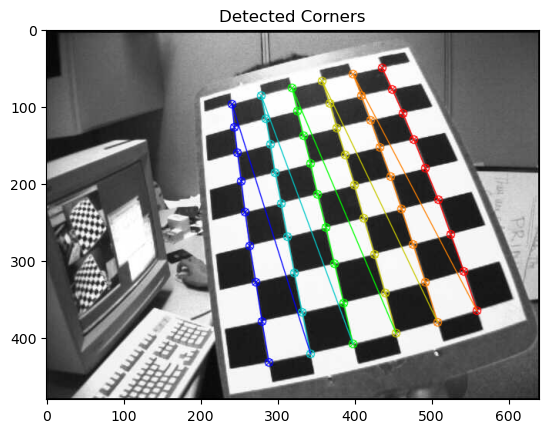

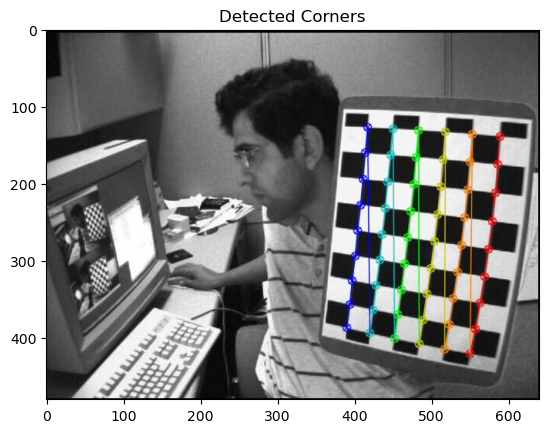

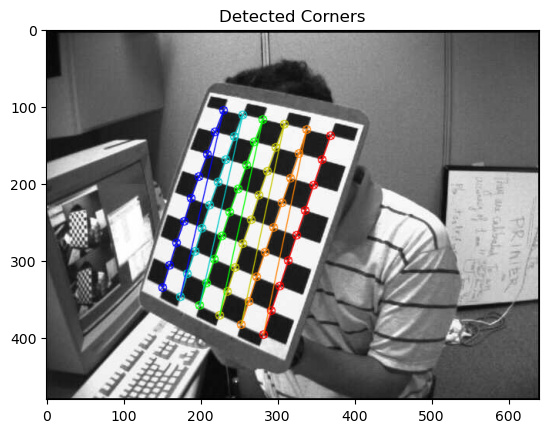

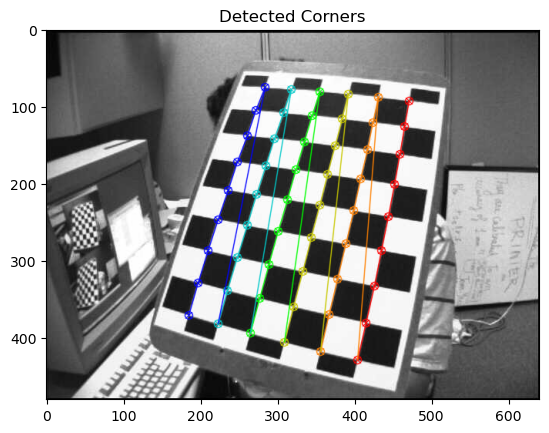

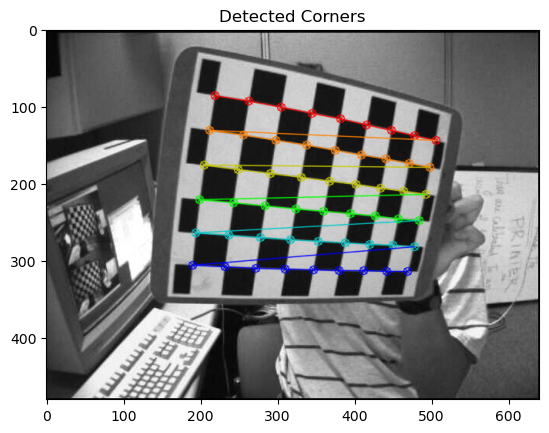

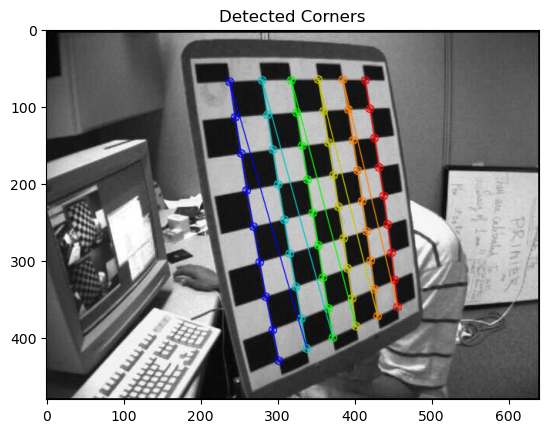

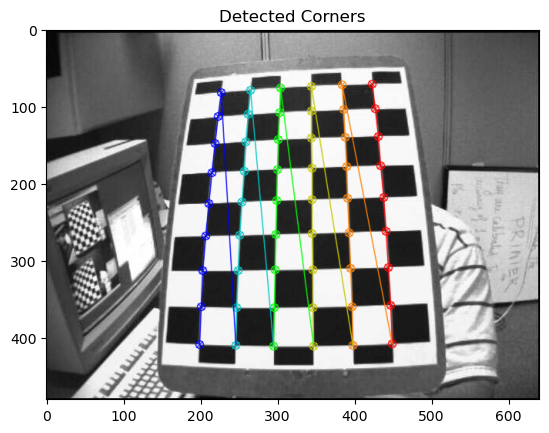

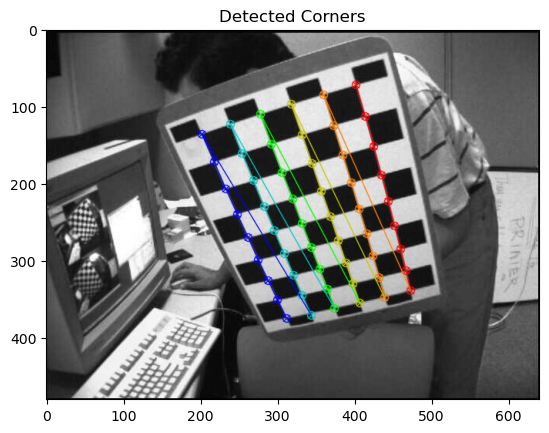

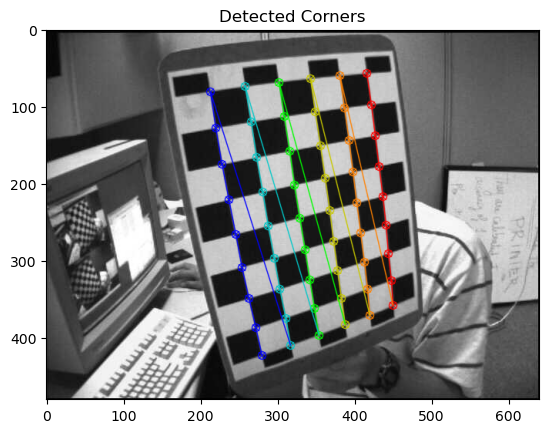

Camera matrix:
[[536.07343019   0.         342.37038791]
 [  0.         536.01634475 235.53685635]
 [  0.           0.           1.        ]]

Distortion coefficients:
[[-0.26509006 -0.0467439   0.00183301 -0.00031471  0.25231586]]

Mean distance to calibration target center: 35.197221966831485
Closest distance to calibration target center: 29.74307144972932
Farthest distance to calibration target center: 42.11796001725558


In [27]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
# Termination criteria for corner sub-pixel refinement
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points (3D points in real-world space)
objp = np.zeros((6 * 9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) * 2.5  # Assuming each checkerboard cell is 2.5 cm

# Arrays to store object points and image points from all the images
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in image plane

# Loop through the images
for filename in glob.glob('./calibration/*.jpg'):
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)
        
        # Draw and display the corners
        img_with_corners = img.copy()
        cv2.drawChessboardCorners(img_with_corners, (9, 6), corners2, ret)
        plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
        plt.title("Detected Corners")
        plt.show()

# Calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Print results
print("Camera matrix:")
print(mtx)
print("\nDistortion coefficients:")
print(dist)
distances = np.linalg.norm(tvecs, axis=1)
mean_distance = np.mean(distances)
min_distance = np.min(distances)
max_distance = np.max(distances)

print("\nMean distance to calibration target center:", mean_distance)
print("Closest distance to calibration target center:", min_distance)
print("Farthest distance to calibration target center:", max_distance)


## Task 2 - Undistort image (30%)

Take a look at the given image (distorted.jpg) and observe the distortion introduced by the camera lens.  
Answer in the notebook if this is a pincushion, or a barrel distortion.  
Load and undistort the image with using either your results of task 1, or the given radial/tangential camera model parameters.  
Show the undistorted image in the notebook. When comparing with the original, what do you observe when looking at the straight lines of the checkerboard?  

Distortion Parameters:

$k_{1..3} = [-0.26509006, -0.04674349, 0.25231504]$  
$p_{1..2} = [0.00183301, -0.00031472]$  

Camera Intrinsics:

$\alpha_x = 536.07344478$  
$\alpha_y = 536.01635905$  
$x_c = 342.37038659$  
$y_c = 235.53685174$

Useful functions:
* ``cv2.getOptimalNewCameraMatrix``
* ``cv2.undistort``

[-0.26509006 -0.04674349  0.00183301 -0.00031472  0.25231504]
(4, 17, 624, 447)


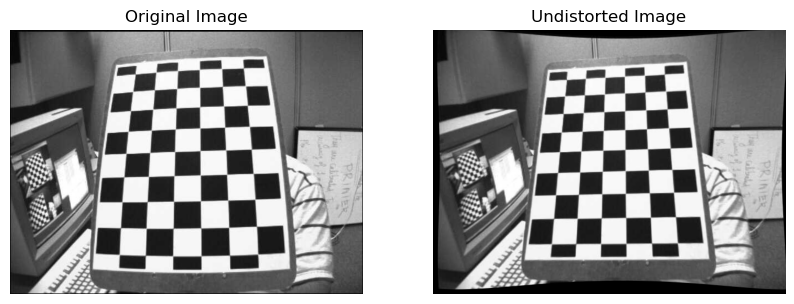

In [24]:

#i think the distortion is the barrel distortion

import cv2
import numpy as np
from matplotlib import pyplot as plt

distorted_image = cv2.imread("distorted.jpg",0)

k = np.array([-0.26509006, -0.04674349, 0.25231504])
p = np.array([0.00183301, -0.00031472])

alpha_x = 536.07344478
alpha_y = 536.01635905
x_c = 342.37038659
y_c = 235.53685174

camera_matrix = np.array([[alpha_x, 0, x_c],
                         [0, alpha_y, y_c],
                         [0, 0, 1]])

h, w = distorted_image.shape

dist = np.concatenate([k[:2], p, k[2:]])     
print(dist)
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist, (w, h), 1, (w, h))
print(roi)

undistorted_image = cv2.undistort(distorted_image, mtx, dist, None, newcameramtx)
plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(distorted_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB))
plt.title('Undistorted Image')
plt.axis('off')

plt.show()